In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

#### Window functions are like aggregation functions
You can use them in conjunction with .resample() which will soon be a deferred operation

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [3]:
df.head()

,A,B,C
2016-07-01 00:00:00,1.900184,-0.372711,0.613071
2016-07-01 00:00:01,-0.121799,-2.388355,0.913329
2016-07-01 00:00:02,-0.701709,-1.859724,-0.396720
2016-07-01 00:00:03,-2.172583,-0.196782,-1.699267
2016-07-01 00:00:04,0.386325,-0.044447,0.659990


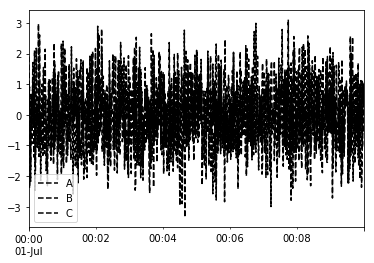

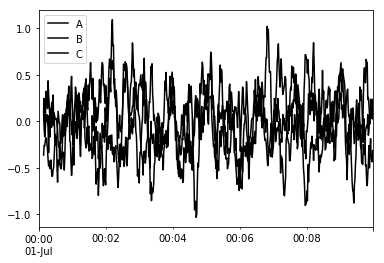

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

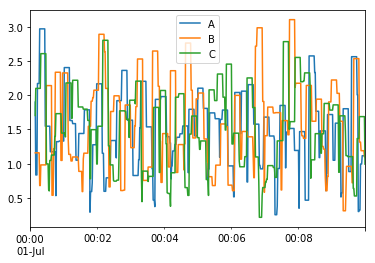

In [10]:
r.max().plot()

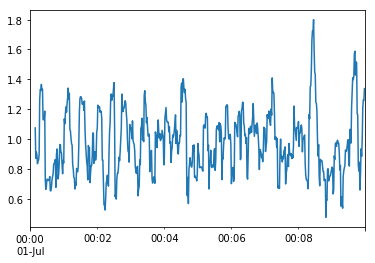

In [24]:
r['A'].std().plot() #can apply to one column at a time

In [11]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\asduser\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.821793,-1.447721,0.773209
2016-07-01 00:00:02,0.244845,-1.603746,0.330159
2016-07-01 00:00:03,-0.485375,-1.178751,-0.282859
2016-07-01 00:00:04,-0.261674,-0.887660,-0.040900
2016-07-01 00:00:05,-0.299092,-0.775946,-0.247555
2016-07-01 00:00:06,-0.131897,-0.548291,-0.110862
2016-07-01 00:00:07,-0.107966,-0.223159,0.234907
2016-07-01 00:00:08,0.012555,-0.241104,0.386667
2016-07-01 00:00:09,0.152167,-0.122857,0.087055


In [12]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [13]:
df.head()

,A,B,C,D
2016-06-06,-1.542929,-0.831565,2.086595,0.167176
2016-06-07,0.969244,0.826967,0.855654,0.320437
2016-06-08,0.147937,1.652171,-0.234924,-0.050527
2016-06-09,0.620589,-0.859816,-1.683014,0.597795
2016-06-10,0.820847,-0.700254,0.103652,-0.524799


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009CDCCF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000972B7F0>], dtype=object)

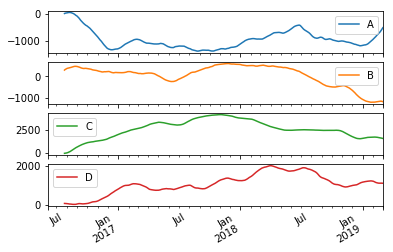

In [14]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [25]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean()).tail()

,A,B,C,D
2019-02-26,1.244509,1.364816,0.711014,0.759928
2019-02-27,1.423676,1.965375,0.712709,0.734225
2019-02-28,1.516206,2.422795,0.743753,0.659077
2019-03-01,1.442508,2.825089,0.765804,0.620567
2019-03-02,1.280239,3.023203,0.756656,0.539345


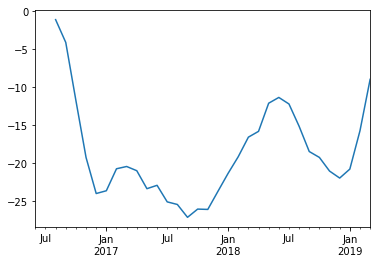

In [26]:
#get 3 month averge
df['A'].resample('M').mean().rolling(window = 3).mean().plot()

In [16]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-1.058307,-0.418082,2.514422,0.327394
2016-06-08,-0.847454,0.270470,2.578723,0.363958
2016-06-09,-0.586880,0.399792,2.190120,0.531689
2016-06-10,-0.266367,0.337334,1.977689,0.527367


#### Will an expanding window provide a more or less stable statistic than a rolling statistic? 
#### When might one vs. the other be appropriate?

Yes, an expanding window is more stable because it is always looking at all the data up to that point, so a sudden shift has little impact. This is appropriate when you feel all your data is of equal relevance. But, if you really want to know what has happened the last 3 days, then a rolling window is more appropriate because it will only look at the relevant time period and not all the data.

### EWMA
#### Why use EWMA?

EWMA stands for exponentially weighted moving average. This uses the idea of an expanding window, but as data points get farther back in time, they are weighted less or count less toward the average. This would be great for something like a continuous glucose monitor. Current levels could easily be predicted by previous ones, but as the points get farther away it makes sense to stop considering them as much.

 Go do it!
 pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [27]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

s = s.cumsum()

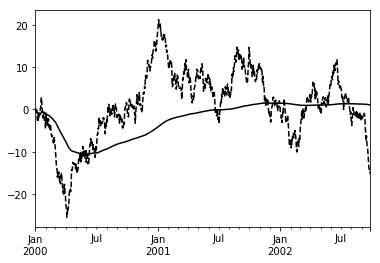

In [30]:
s.expanding().mean().plot(style='k')
s.plot(style='k--')

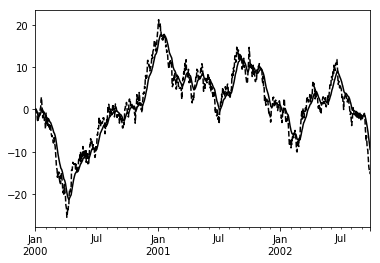

In [31]:
s.plot(style='k--')
s.ewm(span=20).mean().plot(style='k') #EWMA